# CNN on MNIST

### Loading necessary libraries

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

### Loading data

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

### Optimizing the data

In [8]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:    
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [9]:
#converting to one_hot 

train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

### Displaying sample data

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


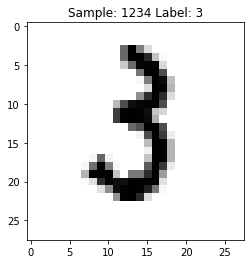

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


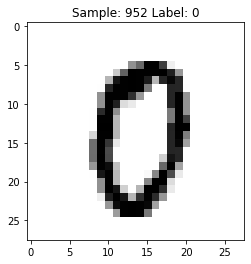

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


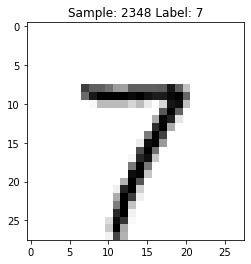

In [12]:
import matplotlib.pyplot as plt

def display_sample(num):
    
    #sample's label
    lb = train_labels[num]
    #sample's image
    img = train_images[num]
    
    #print the one-hot array of this sample's label
    print(lb)
    
    #print the label converted back to a number
    label = lb.argmax(axis = 0)
    
    #Reshape the 768 values into 28x28 image
    image = img.reshape([28,28])
    
    #plot the image
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)    #some random num values
display_sample(952)
display_sample(2348)

### Creating deep NN model

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3),                     #32 batches with which we start sampling 
                 activation = "relu",
                 input_shape = input_shape))
          
#64 3x3 kernels    
model.add(Conv2D(64, (3,3), activation = "relu"))

#Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [16]:
model.compile(loss = "categorical_crossentropy", 
              optimizer = "adam",
              metrics = ["accuracy"])

### Training the model

In [17]:
history = model.fit(train_images, train_labels, 
                    batch_size = 32, 
                    epochs = 12, 
                    verbose = 2, 
                    validation_data = (test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 - 641s - loss: 0.1877 - acc: 0.9425 - val_loss: 0.0400 - val_acc: 0.9865
Epoch 2/12
 - 619s - loss: 0.0795 - acc: 0.9758 - val_loss: 0.0329 - val_acc: 0.9881
Epoch 3/12
 - 635s - loss: 0.0589 - acc: 0.9820 - val_loss: 0.0355 - val_acc: 0.9894
Epoch 4/12
 - 625s - loss: 0.0499 - acc: 0.9848 - val_loss: 0.0326 - val_acc: 0.9907
Epoch 5/12
 - 620s - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0305 - val_acc: 0.9902
Epoch 6/12
 - 632s - loss: 0.0366 - acc: 0.9881 - val_loss: 0.0337 - val_acc: 0.9894
Epoch 7/12
 - 633s - loss: 0.0317 - acc: 0.9897 - val_loss: 0.0281 - val_acc: 0.9925
Epoch 8/12
 - 688s - loss: 0.0299 - acc: 0.9908 - val_loss: 0.0309 - val_acc: 0.9914
Epoch 9/12
 - 679s - loss: 0.0258 - acc: 0.9918 - val_loss: 0.0308 - val_acc: 0.9925
Epoch 10/12
 - 667s - loss: 0.0247 - acc: 0.9917 - val_loss: 0.0289 - val_acc: 0.9926
Epoch 11/12
 - 684s - loss: 0.0218 - acc: 0.9928 - 

### Calculating loss and accuracy

In [18]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030216341893602474
Test accuracy: 0.9918
